 ## Generate data

In [2]:
import pandas as pd
import random
import datetime
from google.colab import files  # This library helps download files

# Setup data to sample from
events = ['AI Workshop', 'Annual Tech Fest', 'Music Concert', 'Career Seminar', 'Hackathon 2025', 'Art Exhibition']
departments = ['Computer Science', 'Mechanical', 'Civil', 'Electrical', 'Management', 'Biotech']
comments_positive = [
    "Amazing experience, learned a lot!", "Great organization and speakers.",
    "The food was good and the content was useful.", "Loved the hands-on session.",
    "Best event of the year!", "Very well managed.", "Insightful and engaging."
]
comments_neutral = [
    "It was okay, nothing special.", "Good but started late.",
    "Crowded but the content was fine.", "Average experience.",
    "Could have been better.", "Not what I expected, but decent."
]
comments_negative = [
    "Complete waste of time.", "Very poorly organized.",
    "The speaker was boring.", "Too much noise and chaos.",
    "The venue was too small.", "Microphone kept failing, frustrating."
]

# Generate 500 rows of data
data = []
for i in range(1000):
    # Randomly pick a sentiment category first to align rating with comment
    sentiment_type = random.choice(['pos', 'neu', 'neg'])

    if sentiment_type == 'pos':
        rating = random.randint(4, 5)
        comment = random.choice(comments_positive)
    elif sentiment_type == 'neu':
        rating = 3
        comment = random.choice(comments_neutral)
    else:
        rating = random.randint(1, 2)
        comment = random.choice(comments_negative)

    row = {
        'Student_ID': 1000 + i,
        'Department': random.choice(departments),
        'Event_Name': random.choice(events),
        'Event_Date': (datetime.date(2025, 1, 1) + datetime.timedelta(days=random.randint(0, 60))).strftime('%Y-%m-%d'),
        'Rating': rating,
        'Feedback_Comments': comment
    }
    data.append(row)

# Convert to DataFrame and Save
df = pd.DataFrame(data)
df.to_csv('student_feedback.csv', index=False)

print("✅ Dataset 'student_feedback.csv' generated successfully!")
print(df.head())

#  DOWNLOAD THE FILE
files.download('student_feedback.csv')

✅ Dataset 'student_feedback.csv' generated successfully!
   Student_ID  Department      Event_Name  Event_Date  Rating  \
0        1000  Electrical  Career Seminar  2025-02-19       1   
1        1001       Civil  Hackathon 2025  2025-02-21       3   
2        1002       Civil     AI Workshop  2025-01-07       4   
3        1003       Civil  Hackathon 2025  2025-02-17       3   
4        1004     Biotech  Career Seminar  2025-02-25       4   

                   Feedback_Comments  
0          Too much noise and chaos.  
1   Not what I expected, but decent.  
2           Insightful and engaging.  
3  Crowded but the content was fine.  
4           Insightful and engaging.  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Setup and Load the data


In [3]:
# 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# 2. Load the Dataset
# Make sure 'student_feedback.csv' is in your Colab files folder
df = pd.read_csv('student_feedback.csv')

# 3. Check the data
print("--- First 5 Rows of Data ---")
print(df.head())

print("\n--- Data Info ---")
print(df.info())

--- First 5 Rows of Data ---
   Student_ID  Department      Event_Name  Event_Date  Rating  \
0        1000  Electrical  Career Seminar  2025-02-19       1   
1        1001       Civil  Hackathon 2025  2025-02-21       3   
2        1002       Civil     AI Workshop  2025-01-07       4   
3        1003       Civil  Hackathon 2025  2025-02-17       3   
4        1004     Biotech  Career Seminar  2025-02-25       4   

                   Feedback_Comments  
0          Too much noise and chaos.  
1   Not what I expected, but decent.  
2           Insightful and engaging.  
3  Crowded but the content was fine.  
4           Insightful and engaging.  

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Student_ID         1000 non-null   int64 
 1   Department         1000 non-null   object
 2   Event_Name         1000 non-n

## Sentiment Analysis

In [4]:
# Function to calculate sentiment
def get_sentiment(text):
    analysis = TextBlob(str(text))
    # Polarity is a score between -1 (Very Negative) and +1 (Very Positive)
    return analysis.sentiment.polarity

# Function to categorize the score
def categorize_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Apply these functions to our data
# We create new columns to store the results
df['Sentiment_Score'] = df['Feedback_Comments'].apply(get_sentiment)
df['Sentiment_Category'] = df['Sentiment_Score'].apply(categorize_sentiment)

print("✅ Sentiment Analysis Complete! Here is the new data:")
print(df[['Feedback_Comments', 'Sentiment_Category', 'Sentiment_Score']].head())

✅ Sentiment Analysis Complete! Here is the new data:
                   Feedback_Comments Sentiment_Category  Sentiment_Score
0          Too much noise and chaos.           Positive         0.200000
1   Not what I expected, but decent.            Neutral         0.033333
2           Insightful and engaging.           Positive         0.400000
3  Crowded but the content was fine.           Positive         0.416667
4           Insightful and engaging.           Positive         0.400000


## Analyze Satisfaction

--- Top 3 Events by Rating ---
       Event_Name    Rating
0  Hackathon 2025  3.163842
1  Career Seminar  3.131944
2     AI Workshop  3.022472

--- Lowest Rated Events ---
         Event_Name    Rating
3    Art Exhibition  2.987013
4  Annual Tech Fest  2.905882
5     Music Concert  2.858757


/tmp/ipython-input-2953428209.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Event_Name', y='Rating', data=event_ratings.head(10), palette='viridis')


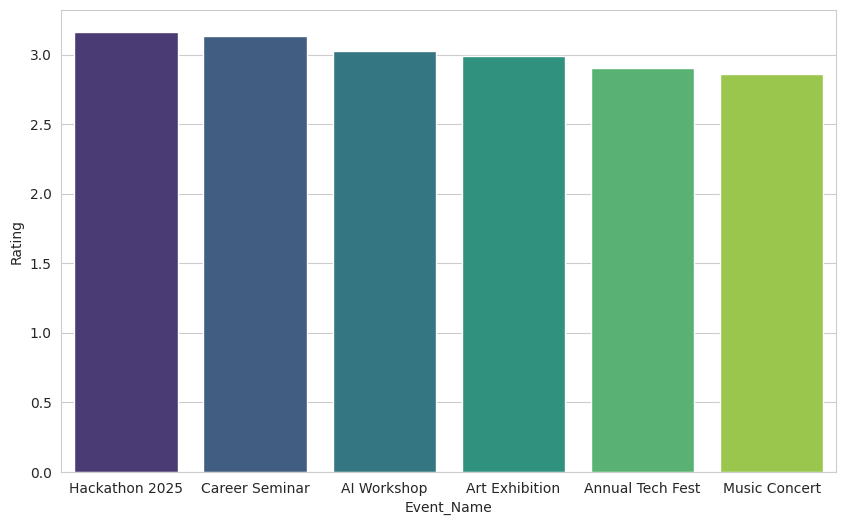

In [17]:
# 1. Calculate Average Rating per Event
event_ratings = df.groupby('Event_Name')['Rating'].mean().sort_values(ascending=False).reset_index()

print("--- Top 3 Events by Rating ---")
print(event_ratings.head(3))

print("\n--- Lowest Rated Events ---")
print(event_ratings.tail(3))

plt.figure(figsize=(10, 6))
sns.barplot(x='Event_Name', y='Rating', data=event_ratings.head(10), palette='viridis')
plt.show()





In [7]:
# 2. Count Positive vs Negative Feedback
sentiment_counts = df['Sentiment_Category'].value_counts()
print("\n--- Sentiment Counts ---")
print(sentiment_counts)


--- Sentiment Counts ---
Sentiment_Category
Positive    632
Negative    252
Neutral     116
Name: count, dtype: int64


In [13]:
# --- DEPARTMENT ANALYSIS ---

# 1. Group by Department and calculate the average rating
dept_analysis = df.groupby('Department')['Rating'].mean().sort_values(ascending=False)

# 2. Print the table
print("--- Average Rating by Department ---")
print(dept_analysis)

# 3. Print the Insight
print(f"\n🏆 Happiest Department: {dept_analysis.index[0]} ({dept_analysis.iloc[0]:.2f}/5)")
print(f"⚠️ Least Happy Department: {dept_analysis.index[-1]} ({dept_analysis.iloc[-1]:.2f}/5)")

--- Average Rating by Department ---
Department
Biotech             3.120482
Mechanical          3.093023
Electrical          3.012739
Computer Science    2.976608
Civil               2.933735
Management          2.916667
Name: Rating, dtype: float64

🏆 Happiest Department: Biotech (3.12/5)
⚠️ Least Happy Department: Management (2.92/5)


## Visualizations

/tmp/ipython-input-3090478634.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df, palette='viridis')


Text(0, 0.5, 'Count')

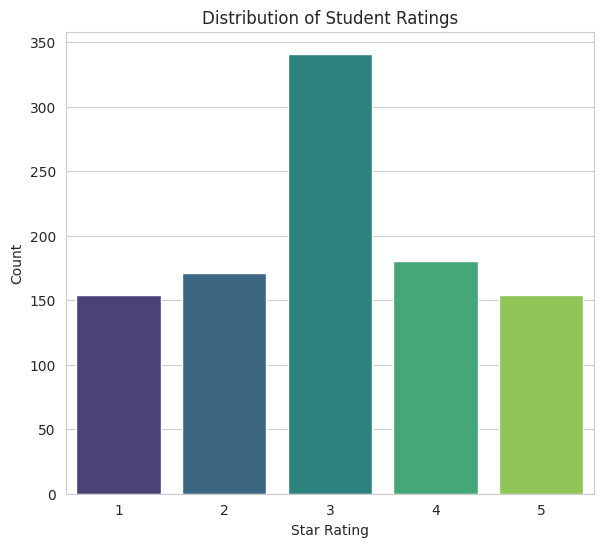

In [8]:
# Set the visual style
sns.set_style("whitegrid")
plt.figure(figsize=(15, 6))

# Chart 1: Ratings Distribution (How many 1-star vs 5-star?)
plt.subplot(1, 2, 1)
sns.countplot(x='Rating', data=df, palette='viridis')
plt.title('Distribution of Student Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')



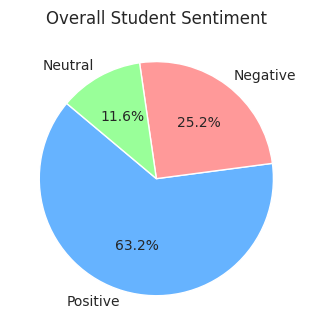

In [9]:
# Chart 2: Sentiment Distribution (Pie Chart)
plt.subplot(1, 2, 2)
colors = {'Positive': '#66b3ff', 'Neutral': '#99ff99', 'Negative': '#ff9999'}
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%',
        colors=[colors[k] for k in sentiment_counts.index], startangle=140)
plt.title('Overall Student Sentiment')

plt.tight_layout()
plt.show()

## Word Cloud

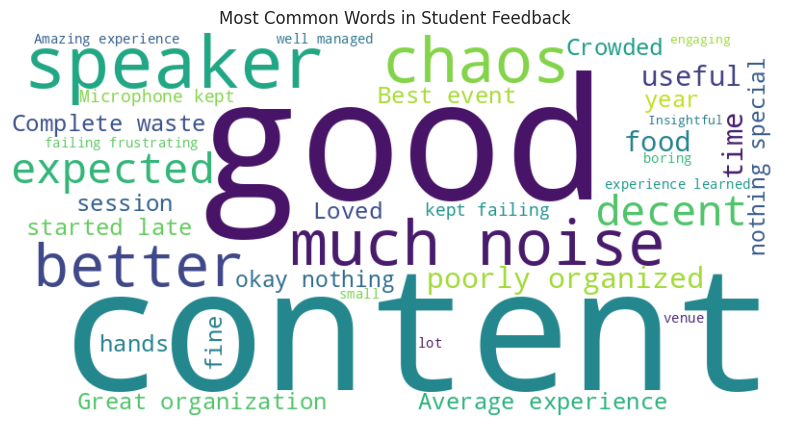

In [10]:
from wordcloud import WordCloud

# Combine all comments into one big text string
all_comments = " ".join(df['Feedback_Comments'])

# Generate the Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

# Display it
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Student Feedback')
plt.show()

## Dashboard

/tmp/ipython-input-2414011372.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df, palette='viridis')
/tmp/ipython-input-2414011372.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='Event_Name', data=avg_ratings, palette='coolwarm')


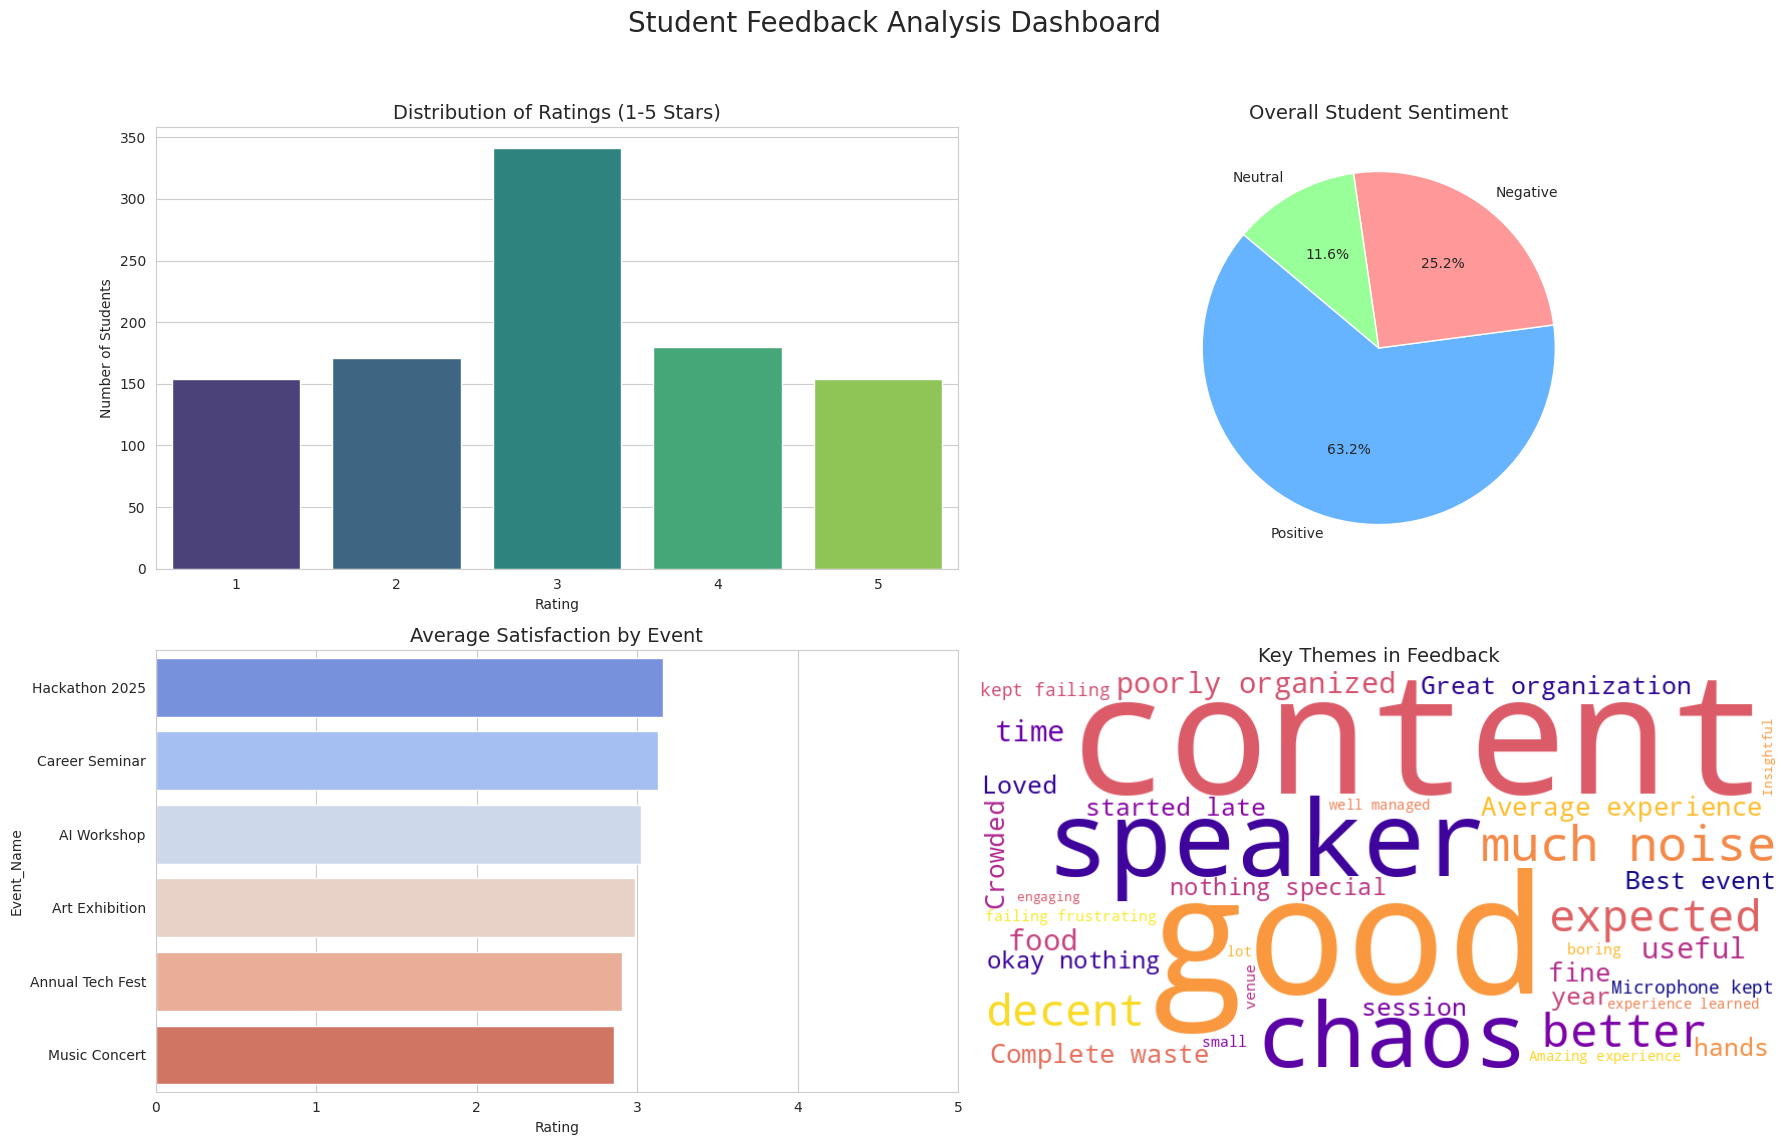

In [16]:
# --- FINAL DASHBOARD GENERATION ---
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set the size of the entire dashboard
plt.figure(figsize=(18, 12))
plt.suptitle('Student Feedback Analysis Dashboard', fontsize=20)

# Chart 1: Ratings Distribution (Top Left)
plt.subplot(2, 2, 1)
sns.countplot(x='Rating', data=df, palette='viridis')
plt.title('Distribution of Ratings (1-5 Stars)', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Number of Students')

# Chart 2: Sentiment Analysis (Top Right)
plt.subplot(2, 2, 2)
# We count the categories we created earlier
sentiment_counts = df['Sentiment_Category'].value_counts()
colors = {'Positive': '#66b3ff', 'Neutral': '#99ff99', 'Negative': '#ff9999'}
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%',
        colors=[colors[k] for k in sentiment_counts.index], startangle=140)
plt.title('Overall Student Sentiment', fontsize=14)

# Chart 3: Average Rating by Event (Bottom Left)
plt.subplot(2, 2, 3)
avg_ratings = df.groupby('Event_Name')['Rating'].mean().sort_values(ascending=False).reset_index()
sns.barplot(x='Rating', y='Event_Name', data=avg_ratings, palette='coolwarm')
plt.title('Average Satisfaction by Event', fontsize=14)
plt.xlim(0, 5)  # Fix the x-axis to be 0-5 stars

# Chart 4: Word Cloud (Bottom Right)
plt.subplot(2, 2, 4)
# Combine all comments into one big text string
text = " ".join(comment for comment in df['Feedback_Comments'])
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Key Themes in Feedback', fontsize=14)

# Display the full dashboard
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for the main title
plt.show()


--- Top 3 Events by Rating ---
       Event_Name    Rating
0  Hackathon 2025  3.163842
1  Career Seminar  3.131944
2     AI Workshop  3.022472

--- Lowest Rated Events ---
         Event_Name    Rating
3    Art Exhibition  2.987013
4  Annual Tech Fest  2.905882
5     Music Concert  2.858757

--- Average Rating by Department ---
         Department    Rating
0           Biotech  3.120482
1        Mechanical  3.093023
2        Electrical  3.012739
3  Computer Science  2.976608
4             Civil  2.933735
5        Management  2.916667

🏆 Happiest Department: Biotech (3.12/5)
⚠️ Least Happy Department: Management (2.92/5)


/tmp/ipython-input-336510277.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df, palette='viridis', ax=ax1)
/tmp/ipython-input-336510277.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='Event_Name', data=event_ratings, palette='coolwarm', ax=ax3)
/tmp/ipython-input-336510277.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='Department', data=dept_ratings, palette='magma', ax=ax4)


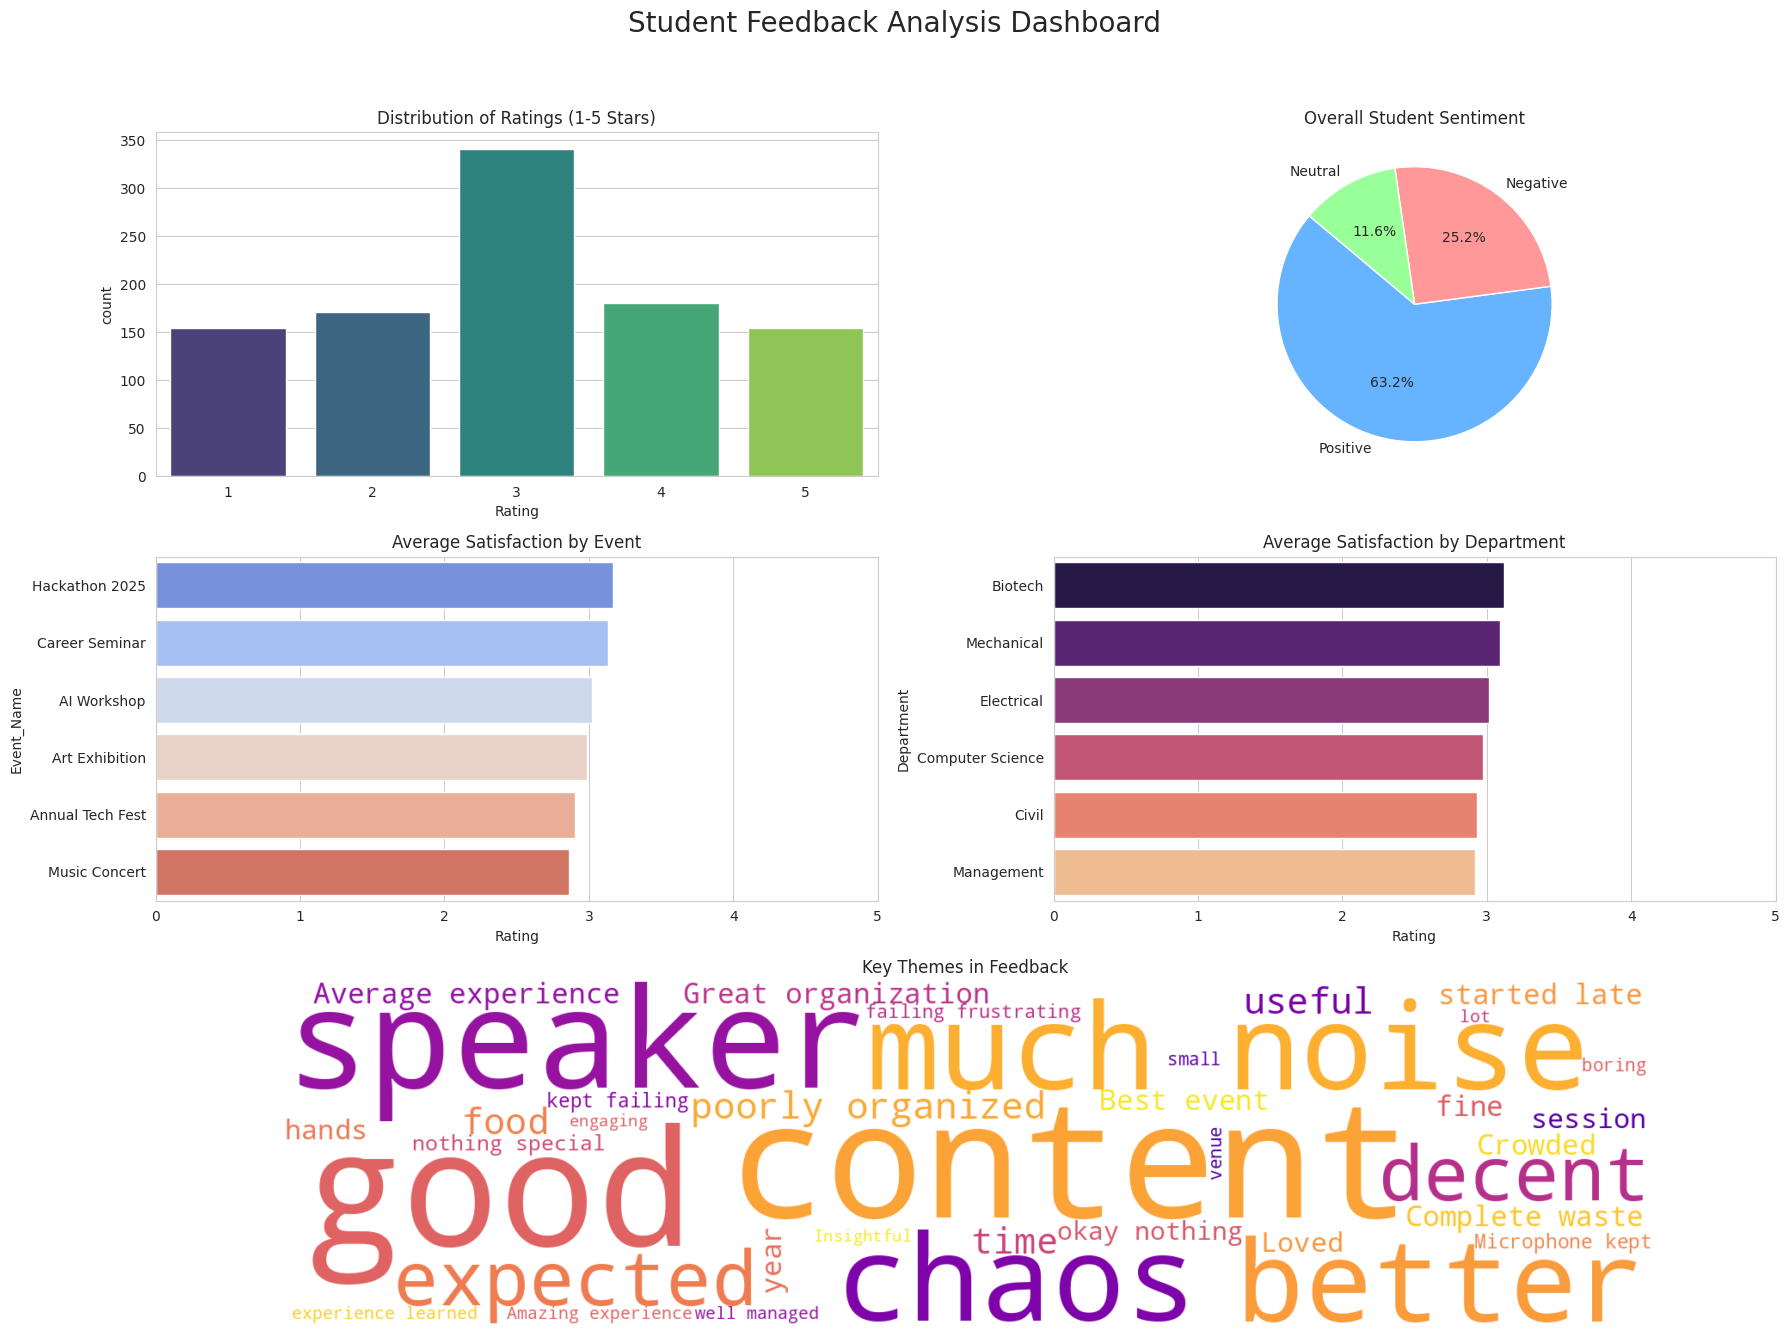

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.gridspec as gridspec

# --- CALCULATE INSIGHTS (Your requested logic) ---
# 1. Event Analysis
event_ratings = df.groupby('Event_Name')['Rating'].mean().sort_values(ascending=False).reset_index()

print("--- Top 3 Events by Rating ---")
print(event_ratings.head(3))
print("\n--- Lowest Rated Events ---")
print(event_ratings.tail(3))

# 2. Department Analysis
dept_ratings = df.groupby('Department')['Rating'].mean().sort_values(ascending=False).reset_index()

print("\n--- Average Rating by Department ---")
print(dept_ratings)
print(f"\n🏆 Happiest Department: {dept_ratings.iloc[0]['Department']} ({dept_ratings.iloc[0]['Rating']:.2f}/5)")
print(f"⚠️ Least Happy Department: {dept_ratings.iloc[-1]['Department']} ({dept_ratings.iloc[-1]['Rating']:.2f}/5)")


# --- GENERATE ENHANCED DASHBOARD ---
plt.figure(figsize=(18, 14))
gs = gridspec.GridSpec(3, 2) # Create a 3-row, 2-column grid

plt.suptitle('Student Feedback Analysis Dashboard', fontsize=20)

# Chart 1: Ratings Distribution (Top Left)
ax1 = plt.subplot(gs[0, 0])
sns.countplot(x='Rating', data=df, palette='viridis', ax=ax1)
ax1.set_title('Distribution of Ratings (1-5 Stars)')

# Chart 2: Sentiment Analysis (Top Right)
ax2 = plt.subplot(gs[0, 1])
sentiment_counts = df['Sentiment_Category'].value_counts()
colors = {'Positive': '#66b3ff', 'Neutral': '#99ff99', 'Negative': '#ff9999'}
ax2.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%',
        colors=[colors[k] for k in sentiment_counts.index], startangle=140)
ax2.set_title('Overall Student Sentiment')

# Chart 3: Average Satisfaction by Event (Middle Left) - YOUR ADDITION
ax3 = plt.subplot(gs[1, 0])
sns.barplot(x='Rating', y='Event_Name', data=event_ratings, palette='coolwarm', ax=ax3)
ax3.set_title('Average Satisfaction by Event')
ax3.set_xlim(0, 5)

# Chart 4: Average Satisfaction by Department (Middle Right) - YOUR ADDITION
ax4 = plt.subplot(gs[1, 1])
sns.barplot(x='Rating', y='Department', data=dept_ratings, palette='magma', ax=ax4)
ax4.set_title('Average Satisfaction by Department')
ax4.set_xlim(0, 5)

# Chart 5: Word Cloud (Bottom - Spans Full Width)
ax5 = plt.subplot(gs[2, :])
text = " ".join(comment for comment in df['Feedback_Comments'])
wordcloud = WordCloud(width=1600, height=400, background_color='white', colormap='plasma').generate(text)
ax5.imshow(wordcloud, interpolation='bilinear')
ax5.axis('off')
ax5.set_title('Key Themes in Feedback')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('enhanced_dashboard.png', dpi=300)
plt.show()